## Esercizio Classificazione NLP4 - Financial

<img src='https://frenzy86.s3.eu-west-2.amazonaws.com/python/fina.png' width=800>


In [20]:
#!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/financial.csv

In [21]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

path = 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/financial.csv'
#df = pd.read_csv(path,names=["text", "target"], header=0)

In [22]:
df = pd.read_csv(path)
df

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [23]:
df = pd.read_csv(path,names=["text", "target"], header=0)

In [24]:
df['text'].head(10)

0    The GeoSolutions technology will leverage Bene...
1    $ESI on lows, down $1.50 to $2.50 BK a real po...
2    For the last quarter of 2010 , Componenta 's n...
3    According to the Finnish-Russian Chamber of Co...
4    The Swedish buyout firm has sold its remaining...
5      $SPY wouldn't be surprised to see a green close
6    Shell's $70 Billion BG Deal Meets Shareholder ...
7    SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...
8    Kone 's net sales rose by some 14 % year-on-ye...
9    The Stockmann department store will have a tot...
Name: text, dtype: object

In [25]:
patterns = {
            r'\d+': '',             # remove digits (numeri)
            
            r'[^\w\s]': '',         # remove punteggiatura e simboli ...,'@!£$%
            r'\b\w{1,2}\b':'',      # remove all token less than2 characters
            r'(http|www)[^\s]+':'', # remove website
            r'\s+': ' '             # sostituisce tutti i multipli spazi con uno spazio
            }

def clean_column(df, column, patterns):
    for pattern, replacement in patterns.items():
        df[column] = df[column].str.replace(pattern, replacement)
        df[column] = df[column].str.lower() # applica il lower
    return df

#solo in preview
clean_column(df, 'text', patterns)

,text,target
0,the geosolutions technology will leverage bene...,positive
1,esi lows down real possibility,negative
2,for the last quarter componenta net sales doub...,positive
3,according the finnishrussian chamber commerce ...,neutral
4,the swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,rising costs have forced packaging producer hu...,negative
5838,nordic walking was first used summer training ...,neutral
5839,according shipping company viking line the dec...,neutral
5840,the building and home improvement trade sales...,neutral


In [26]:
df['target'].value_counts() 

neutral     3130
positive    1852
negative     860
Name: target, dtype: int64

In [27]:
text_neutral = list(map(str, df[df['target']=='neutral']['text']))
text_positive = list(map(str, df[df['target']=='positive']['text']))
text_negative = list(map(str, df[df['target']=='negative']['text']))

text_neutral = ''.join(text_neutral)
text_positive = ''.join(text_positive)
text_negative = ''.join(text_negative)

(-0.5, 799.5, 399.5, -0.5)

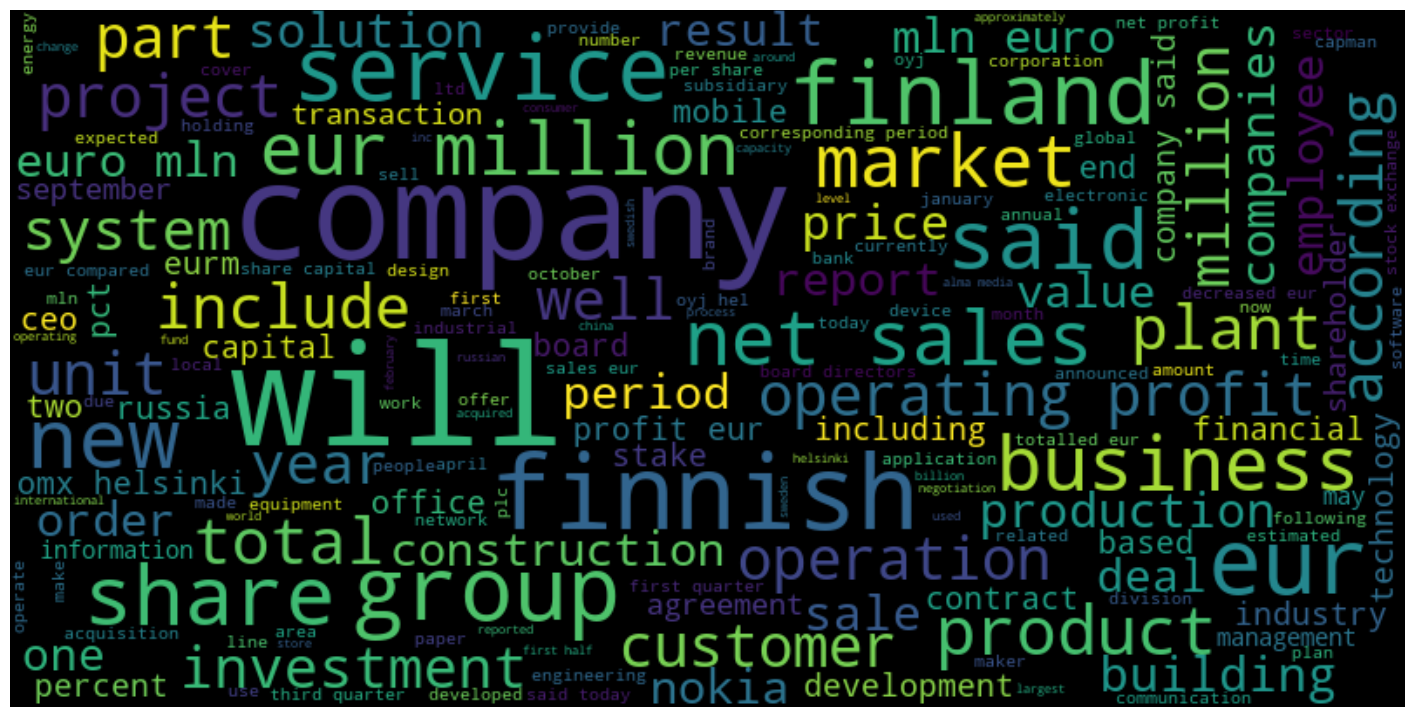

In [28]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color = 'black', width = 800, height = 400,
                      max_words = 180, contour_width = 3,
                      max_font_size = 80, contour_color = 'steelblue',
                      stopwords = STOPWORDS, random_state = 667)

wordcloud.generate(text_neutral)
#wordcloud.generate(text_neutral) o altri paramentri

plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

(-0.5, 799.5, 399.5, -0.5)

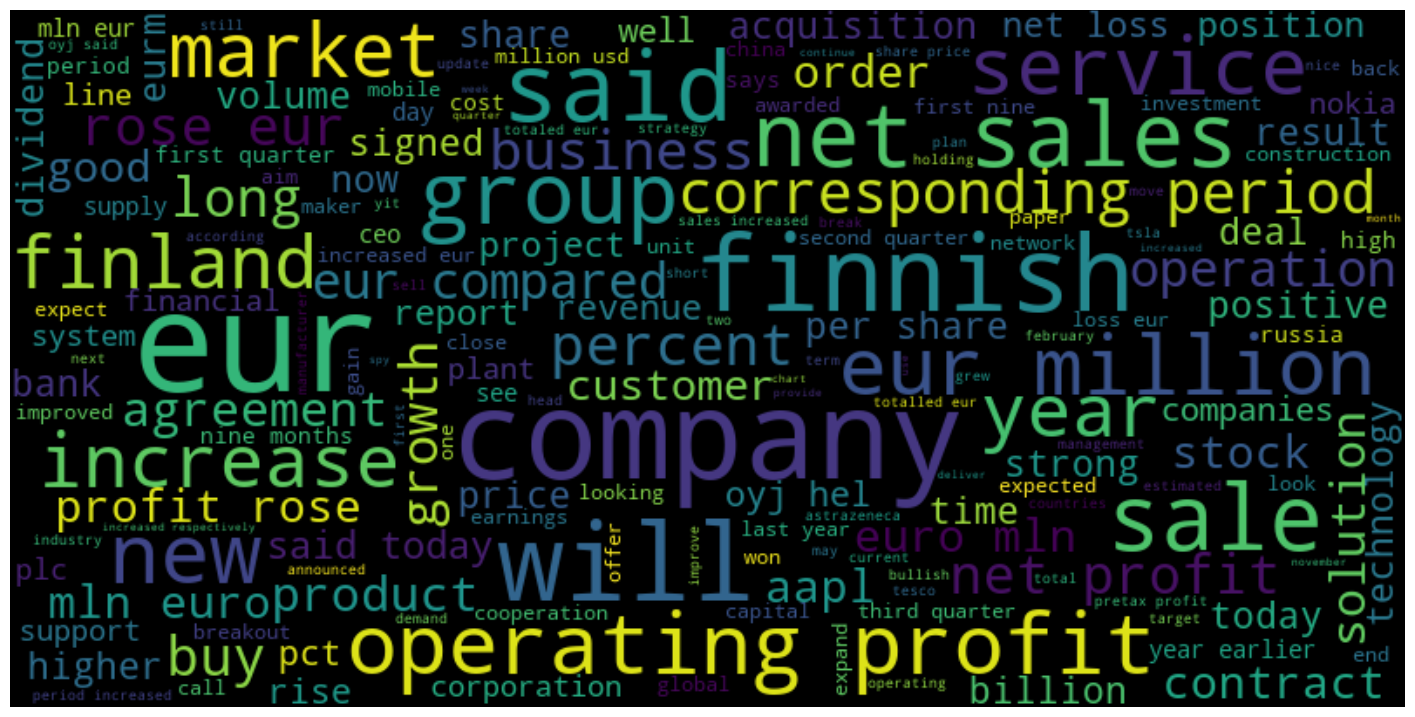

In [29]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color = 'black', width = 800, height = 400,
                      max_words = 180, contour_width = 3,
                      max_font_size = 80, contour_color = 'steelblue',
                      stopwords = STOPWORDS, random_state = 667)

wordcloud.generate(text_positive)
#wordcloud.generate(text_neutral) o altri paramentri

plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

(-0.5, 799.5, 399.5, -0.5)

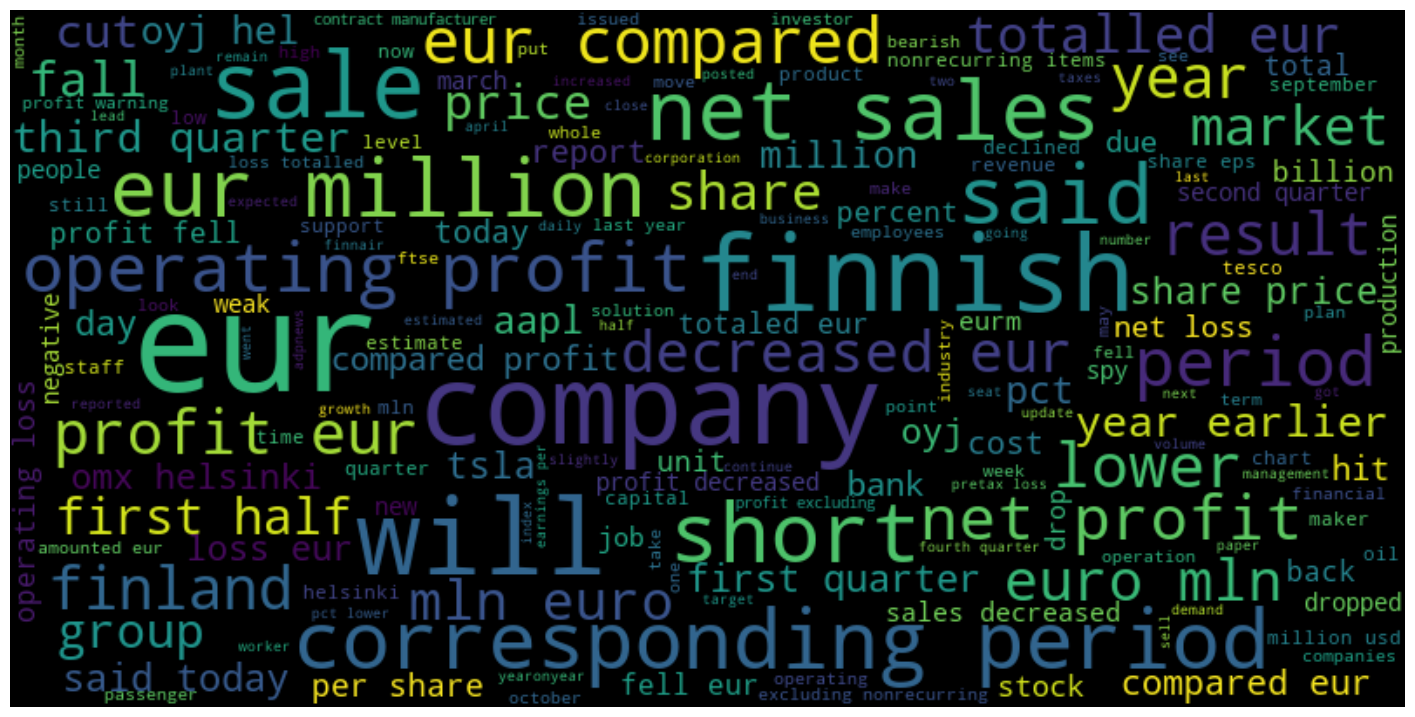

In [30]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color = 'black', width = 800, height = 400,
                      max_words = 180, contour_width = 3,
                      max_font_size = 80, contour_color = 'steelblue',
                      stopwords = STOPWORDS, random_state = 667)

wordcloud.generate(text_negative)
#wordcloud.generate(text_neutral) o altri paramentri

plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

In [31]:
df.isnull().sum()

text      0
target    0
dtype: int64

In [32]:
X = df['text']
y = df['target']
print(X.shape)

(5842,)


In [33]:
from sklearn.feature_extraction.text import CountVectorizer

#vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7)
vectorizer = CountVectorizer(stop_words='english')
X_vect = vectorizer.fit_transform(X).toarray()
X_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [34]:
X_vect.shape

(5842, 10095)

In [35]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidfconverter = TfidfTransformer()
X_tfidf = tfidfconverter.fit_transform(X_vect).toarray()
X_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y,
                                                    test_size=0.3, 
                                                    random_state=667
                                                    )

Modello Randomforest

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=1000, random_state=667,max_depth=5)
classifier.fit(X_train, y_train) 
# provo Random Forest
# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)
test_data_accuracy

0.5362236166571591

XGB classifier 

In [48]:
# from xgboost import XGBClassifier

# xgb_clf = XGBClassifier()
# xgb_clf.fit(X_train,y_train)
# xgb_clf.score(X_test, y_test)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got ['negative' 'neutral' 'positive']

Modello MultinomialNB

In [38]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train) 
#provo il Multinomiale
# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)
test_data_accuracy

0.6588705077010839

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.34      0.28      0.31       252
     neutral       0.70      0.80      0.75       940
    positive       0.70      0.59      0.64       561

    accuracy                           0.66      1753
   macro avg       0.58      0.56      0.57      1753
weighted avg       0.65      0.66      0.65      1753



Text(95.72222222222221, 0.5, 'Actual')

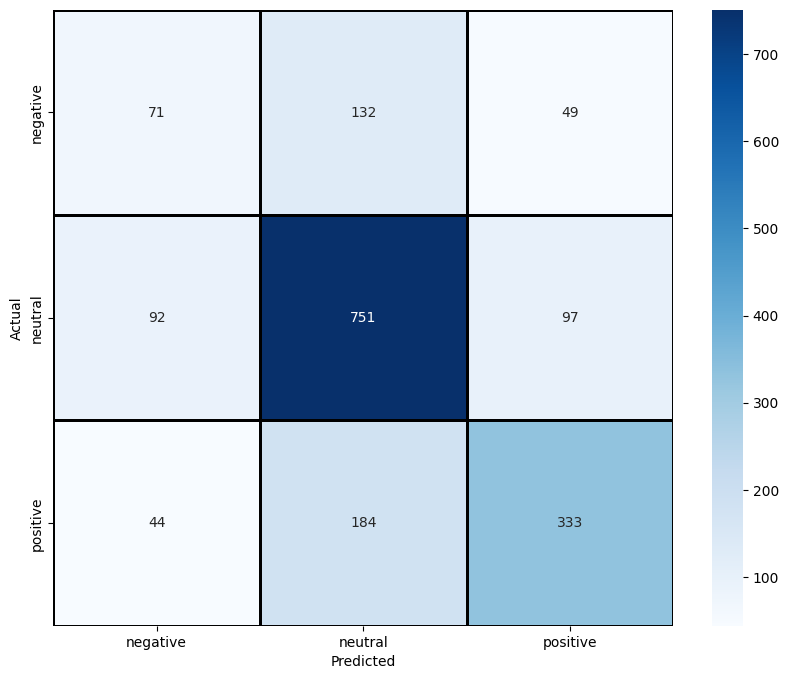

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = classifier.classes_, 
            yticklabels = classifier.classes_)

plt.xlabel("Predicted")
plt.ylabel("Actual")

ModelloSDG

In [41]:
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier(loss='log', penalty='l2',alpha=1e-3, random_state=667, max_iter=5, tol=None)
classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_test,y_pred)
test_data_accuracy

0.6217912150598973

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.44      0.02      0.03       252
     neutral       0.61      0.95      0.74       940
    positive       0.72      0.35      0.47       561

    accuracy                           0.62      1753
   macro avg       0.59      0.44      0.41      1753
weighted avg       0.62      0.62      0.55      1753



Text(95.72222222222221, 0.5, 'Actual')

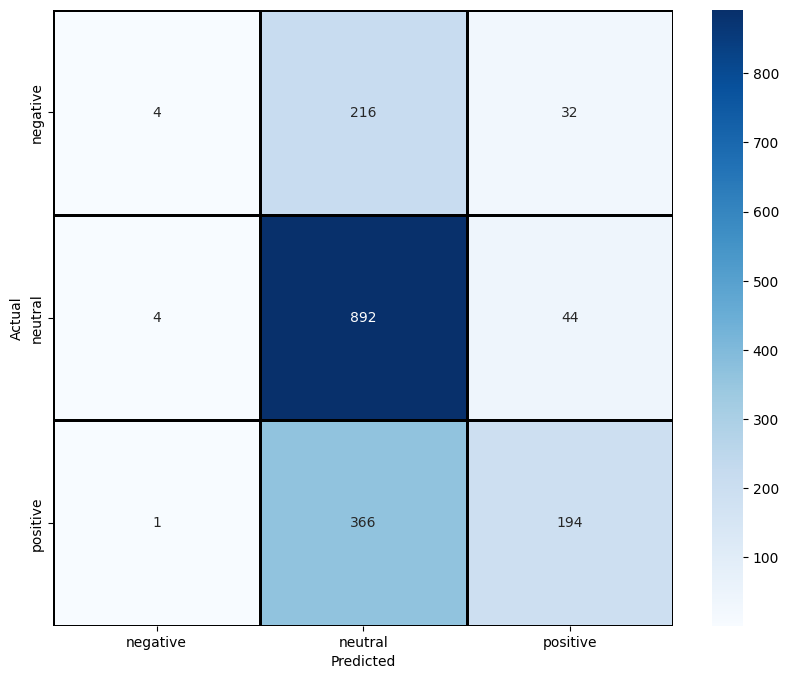

In [43]:

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = classifier.classes_, 
            yticklabels = classifier.classes_)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, 
                                                    random_state=667
                                                    )


from sklearn.pipeline import Pipeline

bow = CountVectorizer(max_features=1500, min_df=5, max_df=0.7)
tfidf = TfidfTransformer() #inserire modello migliore scelto
#clf =SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=667, max_iter=5, tol=None)
clf = classifier = MultinomialNB(alpha=0.1) #inserire modello migliore scelto dopo clf
#clf = classifier = RandomForestClassifier(n_estimators=1000, random_state=667,max_depth=5)
pipe = Pipeline([
                ('bow',bow),
                ('tfidf',tfidf),
                ('clf',clf),
                ])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

test_data_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.6828294352538505


In [45]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipe, X, y, scoring = 'f1_micro', cv = 8)

print(f'scores={scores}')
print(f'mean={np.mean(scores)}')
print(f'std={np.std(scores)}')

scores=[0.6880985  0.67305062 0.69315068 0.68082192 0.69863014 0.68767123
 0.67260274 0.69452055]
mean=0.6860682963851358
std=0.009113159807266659


In [46]:
import joblib
joblib.dump(pipe,'es4.pkl')

['es4.pkl']

In [47]:
import joblib

uploaded_model = joblib.load('es4.pkl')
pred = uploaded_model.predict(['good']) # 1 --> Diabetic sono esempi
pred[0]

'positive'